## FAANG - tastic Insights: Predict Stock Prices with Regression and MLflowTo develop an intelligent and user-friendly Streamlit web application that predicts the closing price of FAANG stocks based on user inputs.



### IMPORT NECESSARY LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("C:/Users/ragin/Downloads/FAANG - FAANG.csv.csv")
data.head()

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Price to Book Ratio,Enterprise Value,Total Debt,Total Assets,Total Equity,Beta (5Y),Annual Dividend Rate,Trailing Twelve Months (TTM) Revenue,Trailing Twelve Months (TTM) EBITDA,Trailing Twelve Months (TTM) Earnings
0,Apple,AAPL,1/3/2005,1.156786,1.162679,1.117857,1.130179,0.954409,691992000,3.580000e+12,...,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
1,Apple,AAPL,1/4/2005,1.139107,1.169107,1.124464,1.141786,0.964210,1096810400,3.580000e+12,...,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
2,Apple,AAPL,1/5/2005,1.151071,1.165179,1.143750,1.151786,0.972655,680433600,3.580000e+12,...,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
3,Apple,AAPL,1/6/2005,1.154821,1.159107,1.130893,1.152679,0.973409,705555200,3.580000e+12,...,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN
4,Apple,AAPL,1/7/2005,1.160714,1.243393,1.156250,1.236607,1.044284,2227450400,3.580000e+12,...,53.66043,3.570000e+12,1.010000e+11,NaN,NaN,1.239,1.0,NaN,NaN,NaN


### Data Cleaning


In [6]:
data.shape

(23055, 41)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 41 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Company                                23055 non-null  object 
 1   Ticker                                 23055 non-null  object 
 2   Date                                   23055 non-null  object 
 3   Open                                   23055 non-null  float64
 4   High                                   23055 non-null  float64
 5   Low                                    23055 non-null  float64
 6   Close                                  23055 non-null  float64
 7   Adj Close                              23055 non-null  float64
 8   Volume                                 23055 non-null  int64  
 9   Market Cap                             23055 non-null  float64
 10  PE Ratio                               23055 non-null  float64
 11  Be

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,23055.0,9.364766e+01,1.260602e+02,1.139107e+00,1.172898e+01,3.858500e+01,1.348500e+02,7.349000e+02
High,23055.0,9.486310e+01,1.277498e+02,1.159107e+00,1.186449e+01,3.898300e+01,1.365500e+02,7.360000e+02
Low,23055.0,9.242093e+01,1.243307e+02,1.117857e+00,1.158783e+01,3.829750e+01,1.334500e+02,7.225000e+02
Close,23055.0,9.367227e+01,1.260690e+02,1.130179e+00,1.172093e+01,3.859850e+01,1.349700e+02,7.302900e+02
Adj Close,23055.0,9.320657e+01,1.261236e+02,9.544085e-01,1.136661e+01,3.805078e+01,1.341740e+02,7.302900e+02
Volume,23055.0,1.384445e+08,2.430001e+08,1.144000e+06,2.131500e+07,5.576380e+07,1.302896e+08,3.372970e+09
Market Cap,23055.0,1.912023e+12,1.084576e+12,3.250000e+11,1.470000e+12,2.000000e+12,2.020000e+12,3.580000e+12
PE Ratio,23055.0,3.591245e+01,8.300362e+00,2.349283e+01,2.961299e+01,3.578995e+01,4.282450e+01,4.549641e+01
Beta,18073.0,1.154244e+00,7.987823e-02,1.038000e+00,1.038000e+00,1.147000e+00,1.239000e+00,1.239000e+00
EPS,23055.0,1.029935e+01,6.071170e+00,4.180000e+00,6.570000e+00,6.970000e+00,1.767000e+01,1.956000e+01


In [9]:
data.describe(include='object')

,Company,Ticker,Date,Analyst Recommendation
count,23055,23055,23055,23055
unique,5,5,4983,1
top,Apple,AAPL,11/24/2014,buy
freq,4983,4983,5,23055


In [10]:
data.isnull().sum()

Company                                      0
Ticker                                       0
Date                                         0
Open                                         0
High                                         0
Low                                          0
Close                                        0
Adj Close                                    0
Volume                                       0
Market Cap                                   0
PE Ratio                                     0
Beta                                      4982
EPS                                          0
Forward PE                                   0
Revenue                                  23055
Gross Profit                             23055
Operating Income                         23055
Net Income                                   0
Debt to Equity                               0
Return on Equity (ROE)                       0
Current Ratio                                0
Dividends Pai

In [11]:
data['Beta'] = data['Beta'].fillna(data['Beta'].mean())
data['Beta (5Y)'] = data['Beta (5Y)'].fillna(data['Beta (5Y)'].mean())

In [12]:
data = data.dropna(axis=1)

In [13]:
data.isnull().sum()

Company                     0
Ticker                      0
Date                        0
Open                        0
High                        0
Low                         0
Close                       0
Adj Close                   0
Volume                      0
Market Cap                  0
PE Ratio                    0
Beta                        0
EPS                         0
Forward PE                  0
Net Income                  0
Debt to Equity              0
Return on Equity (ROE)      0
Current Ratio               0
Quarterly Revenue Growth    0
Analyst Recommendation      0
Target Price                0
Free Cash Flow              0
Operating Margin            0
Profit Margin               0
Quick Ratio                 0
Price to Book Ratio         0
Enterprise Value            0
Total Debt                  0
Beta (5Y)                   0
dtype: int64

In [14]:
data.shape

(23055, 29)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23055 entries, 0 to 23054
Data columns (total 29 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Company                   23055 non-null  object 
 1   Ticker                    23055 non-null  object 
 2   Date                      23055 non-null  object 
 3   Open                      23055 non-null  float64
 4   High                      23055 non-null  float64
 5   Low                       23055 non-null  float64
 6   Close                     23055 non-null  float64
 7   Adj Close                 23055 non-null  float64
 8   Volume                    23055 non-null  int64  
 9   Market Cap                23055 non-null  float64
 10  PE Ratio                  23055 non-null  float64
 11  Beta                      23055 non-null  float64
 12  EPS                       23055 non-null  float64
 13  Forward PE                23055 non-null  float64
 14  Net In

In [16]:
data.duplicated().sum()

0

In [17]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y',errors='coerce')

data['Date'] = data['Date'].dt.strftime('%Y/%m/%d')


In [18]:
print(data['Date'])

0        2005/03/01
1        2005/04/01
2        2005/05/01
3        2005/06/01
4        2005/07/01
            ...    
23050    2024/11/10
23051           NaN
23052           NaN
23053           NaN
23054           NaN
Name: Date, Length: 23055, dtype: object


In [19]:
data.tail()

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Analyst Recommendation,Target Price,Free Cash Flow,Operating Margin,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y)
23050,Netflix,NFLX,2024/11/10,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,3.250000e+11,...,buy,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,1.154244
23051,Netflix,NFLX,NaN,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,3.250000e+11,...,buy,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,1.154244
23052,Netflix,NFLX,NaN,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,3.250000e+11,...,buy,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,1.154244
23053,Netflix,NFLX,NaN,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,3.250000e+11,...,buy,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,1.154244
23054,Netflix,NFLX,NaN,704.349976,704.409973,677.880005,687.650024,687.650024,8820000,3.250000e+11,...,buy,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,1.154244


In [20]:
data['Date'].isna().sum()

13932

In [21]:
data['Date'] = data['Date'].fillna(method='ffill')


In [22]:
data.tail()

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Analyst Recommendation,Target Price,Free Cash Flow,Operating Margin,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y)
23050,Netflix,NFLX,2024/11/10,734.900024,736.000000,721.219971,722.789978,722.789978,2299500,3.250000e+11,...,buy,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,1.154244
23051,Netflix,NFLX,2024/11/10,725.000000,726.619995,711.309998,713.000000,713.000000,2797100,3.250000e+11,...,buy,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,1.154244
23052,Netflix,NFLX,2024/11/10,712.510010,713.400024,699.780029,705.979981,705.979981,2932800,3.250000e+11,...,buy,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,1.154244
23053,Netflix,NFLX,2024/11/10,703.429993,705.590027,697.820007,702.000000,702.000000,2494300,3.250000e+11,...,buy,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,1.154244
23054,Netflix,NFLX,2024/11/10,704.349976,704.409973,677.880005,687.650024,687.650024,8820000,3.250000e+11,...,buy,718.88,22181484544,0.29614,0.20701,0.861,14.262457,3.010000e+11,1.598133e+10,1.154244


### Remove Outliers


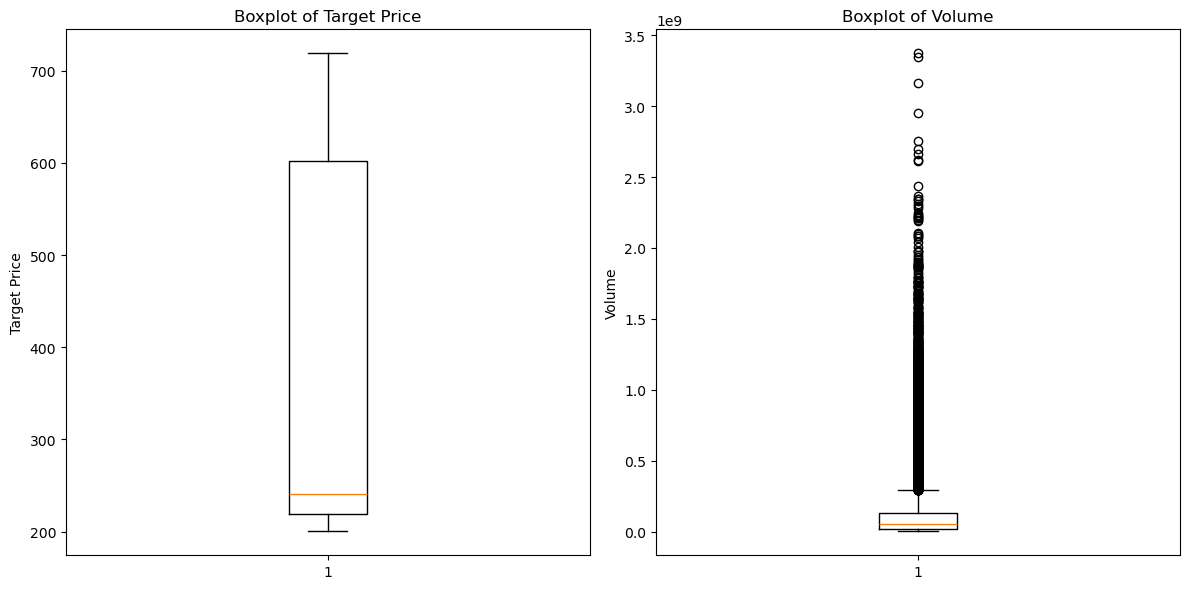

In [24]:
# Create a figure with two subplots in a row
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Boxplot for "Price to Book Ratio"
axes[0].boxplot(data['Target Price'])
axes[0].set_title("Boxplot of Target Price")
axes[0].set_ylabel("Target Price")

# Boxplot for "Volume"
axes[1].boxplot(data['Volume'])
axes[1].set_title("Boxplot of Volume")
axes[1].set_ylabel("Volume")

# Display the plots
plt.tight_layout()
plt.show()

To check the Outliers, the data points that are significantly different from the majority of the data in a dataset. They lie far away from the "normal" range of values and can be unusually high or low compared to the other observations.
### Display the Outliers data

In [26]:
from scipy.stats import zscore

# Function to identify outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers[column], lower_bound, upper_bound

# Function to identify outliers using Z-Score
def detect_zscore(data, column, threshold=3):
    z_scores = zscore(data[column])
    outliers = data[(z_scores > threshold) | (z_scores < -threshold)]
    return outliers[column]

# Detect outliers using IQR for 'price' and 'volume'
price_outliers_iqr, price_lower, price_upper = detect_outliers_iqr(data, 'Target Price')
volume_outliers_iqr, volume_lower, volume_upper = detect_outliers_iqr(data, 'Volume')

# Detect outliers using Z-Score for 'price' and 'volume'
price_zscore = detect_zscore(data, 'Target Price')
volume_zscore = detect_zscore(data, 'Volume')

# Print Results
print("IQR Method:")
print(f"Target Price Outliers (IQR): \n{price_outliers_iqr}")
print(f"Volume Outliers (IQR): \n{volume_outliers_iqr}")

print("\nZ-Score Method:")
print(f"Target Price (Z-Score): \n{price_zscore}")
print(f"Volume  (Z-Score): \n{volume_zscore}")


IQR Method:
Target Price Outliers (IQR): 
Series([], Name: Target Price, dtype: float64)
Volume Outliers (IQR): 
0         691992000
1        1096810400
2         680433600
3         705555200
4        2227450400
            ...    
15748     438188000
16319     331300000
16570     299276000
16886     311346000
19789     315541800
Name: Volume, Length: 2781, dtype: int64

Z-Score Method:
Target Price (Z-Score): 
Series([], Name: Target Price, dtype: float64)
Volume  (Z-Score): 
1        1096810400
4        2227450400
5        1725309600
6        2611627200
7        1919702400
            ...    
13671    2086584000
13672    1243590000
13673    1014668000
13734    1209048000
14302    1166116000
Name: Volume, Length: 595, dtype: int64


### Remove the Outliers and create a new dataset

In [28]:
import pandas as pd
from scipy.stats import zscore


# Step 2: Detect and Remove Outliers Using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1  # Interquartile Range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out rows outside the bounds
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data, lower_bound, upper_bound

# Step 3: Detect and Remove Outliers Using Z-Score
def remove_outliers_zscore(data, column, threshold=3):
    # Calculate the Z-Score for the column
    z_scores = zscore(data[column])
    # Filter out rows where the Z-Score is above the threshold or below -threshold
    filtered_data = data[(z_scores < threshold) & (z_scores > -threshold)]
    return filtered_data

# Step 4: Apply IQR Method for "Price" and "Volume"
data_iqr, price_lower, price_upper = remove_outliers_iqr(data, 'Target Price')
data_iqr, volume_lower, volume_upper = remove_outliers_iqr(data_iqr, 'Volume')

# Step 5: Alternatively, Apply Z-Score for "Price" and "Volume"
data_zscore = remove_outliers_zscore(data, 'Target Price')
data_zscore = remove_outliers_zscore(data_zscore, 'Volume')

# Step 6: Print the Results
print("\nIQR Method:")
print(f"Price Column: Outlier Bounds [{price_lower}, {price_upper}]")
print(f"Volume Column: Outlier Bounds [{volume_lower}, {volume_upper}]")
print(f"Dataset After Removing Outliers (IQR): \n{data_iqr.head()}")

print("\nZ-Score Method:")
print(f"Dataset After Removing Outliers (Z-Score): \n{data_zscore.head()}")

# Step 7: Save the Filtered Dataset (if required)
data_iqr.to_csv('filtered_data_iqr.csv', index=False)



IQR Method:
Price Column: Outlier Bounds [-355.1200000000001, 1175.6000000000001]
Volume Column: Outlier Bounds [-142146900.0, 293751500.0]
Dataset After Removing Outliers (IQR): 
    Company Ticker        Date      Open      High       Low     Close  \
57    Apple   AAPL  2005/11/03  1.526786  1.534286  1.516786  1.518929   
125   Apple   AAPL  2005/01/07  1.315357  1.320357  1.296071  1.303571   
129   Apple   AAPL  2005/08/07  1.352500  1.367143  1.338214  1.366071   
141   Apple   AAPL  2005/12/07  1.571786  1.575357  1.548571  1.558214   
142   Apple   AAPL  2005/12/07  1.565357  1.573929  1.523929  1.571071   

     Adj Close     Volume    Market Cap  ...  Analyst Recommendation  \
57    1.282698  275410800  3.580000e+12  ...                     buy   
125   1.100834  250000800  3.580000e+12  ...                     buy   
129   1.153613  290735200  3.580000e+12  ...                     buy   
141   1.315873  268592800  3.580000e+12  ...                     buy   
142   1.326731

In [29]:
data1 = pd.read_csv('filtered_data_iqr.csv')

In [30]:
data1.shape

(20274, 29)

In [31]:
data1.head()

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Analyst Recommendation,Target Price,Free Cash Flow,Operating Margin,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y)
0,Apple,AAPL,2005/11/03,1.526786,1.534286,1.516786,1.518929,1.282698,275410800,3.580000e+12,...,buy,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3.570000e+12,1.010000e+11,1.239
1,Apple,AAPL,2005/01/07,1.315357,1.320357,1.296071,1.303571,1.100834,250000800,3.580000e+12,...,buy,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3.570000e+12,1.010000e+11,1.239
2,Apple,AAPL,2005/08/07,1.352500,1.367143,1.338214,1.366071,1.153613,290735200,3.580000e+12,...,buy,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3.570000e+12,1.010000e+11,1.239
3,Apple,AAPL,2005/12/07,1.571786,1.575357,1.548571,1.558214,1.315873,268592800,3.580000e+12,...,buy,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3.570000e+12,1.010000e+11,1.239
4,Apple,AAPL,2005/12/07,1.565357,1.573929,1.523929,1.571071,1.326731,283749200,3.580000e+12,...,buy,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3.570000e+12,1.010000e+11,1.239


### Encoding Categorical Variables

In [33]:
data_encoder = pd.get_dummies(data1, columns=['Company'], drop_first=False)


In [34]:
data_encoder.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,PE Ratio,...,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y),Company_Amazon,Company_Apple,Company_Facebook,Company_Google,Company_Netflix
0,AAPL,2005/11/03,1.526786,1.534286,1.516786,1.518929,1.282698,275410800,3.580000e+12,35.789955,...,0.798,53.66043,3.570000e+12,1.010000e+11,1.239,False,True,False,False,False
1,AAPL,2005/01/07,1.315357,1.320357,1.296071,1.303571,1.100834,250000800,3.580000e+12,35.789955,...,0.798,53.66043,3.570000e+12,1.010000e+11,1.239,False,True,False,False,False
2,AAPL,2005/08/07,1.352500,1.367143,1.338214,1.366071,1.153613,290735200,3.580000e+12,35.789955,...,0.798,53.66043,3.570000e+12,1.010000e+11,1.239,False,True,False,False,False
3,AAPL,2005/12/07,1.571786,1.575357,1.548571,1.558214,1.315873,268592800,3.580000e+12,35.789955,...,0.798,53.66043,3.570000e+12,1.010000e+11,1.239,False,True,False,False,False
4,AAPL,2005/12/07,1.565357,1.573929,1.523929,1.571071,1.326731,283749200,3.580000e+12,35.789955,...,0.798,53.66043,3.570000e+12,1.010000e+11,1.239,False,True,False,False,False


In [35]:
data1.head()

,Company,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Market Cap,...,Analyst Recommendation,Target Price,Free Cash Flow,Operating Margin,Profit Margin,Quick Ratio,Price to Book Ratio,Enterprise Value,Total Debt,Beta (5Y)
0,Apple,AAPL,2005/11/03,1.526786,1.534286,1.516786,1.518929,1.282698,275410800,3.580000e+12,...,buy,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3.570000e+12,1.010000e+11,1.239
1,Apple,AAPL,2005/01/07,1.315357,1.320357,1.296071,1.303571,1.100834,250000800,3.580000e+12,...,buy,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3.570000e+12,1.010000e+11,1.239
2,Apple,AAPL,2005/08/07,1.352500,1.367143,1.338214,1.366071,1.153613,290735200,3.580000e+12,...,buy,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3.570000e+12,1.010000e+11,1.239
3,Apple,AAPL,2005/12/07,1.571786,1.575357,1.548571,1.558214,1.315873,268592800,3.580000e+12,...,buy,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3.570000e+12,1.010000e+11,1.239
4,Apple,AAPL,2005/12/07,1.565357,1.573929,1.523929,1.571071,1.326731,283749200,3.580000e+12,...,buy,240.78,86158123008,0.29556,0.26441,0.798,53.66043,3.570000e+12,1.010000e+11,1.239


##  Exploratory Data Analysis (EDA)### Descriptive Statistics:



In [37]:
data1.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,20274.0,1.051765e+02,1.302116e+02,1.300000e+00,1.516385e+01,5.254000e+01,1.483025e+02,7.349000e+02
High,20274.0,1.065402e+02,1.319607e+02,1.315000e+00,1.531882e+01,5.317175e+01,1.498775e+02,7.360000e+02
Low,20274.0,1.038026e+02,1.284178e+02,1.272857e+00,1.500400e+01,5.189286e+01,1.467030e+02,7.225000e+02
Close,20274.0,1.052059e+02,1.302179e+02,1.290000e+00,1.518443e+01,5.249975e+01,1.484125e+02,7.302900e+02
Adj Close,20274.0,1.048235e+02,1.302221e+02,1.100834e+00,1.505580e+01,5.202270e+01,1.473915e+02,7.302900e+02
Volume,20274.0,6.597942e+07,6.280194e+07,1.144000e+06,1.868912e+07,4.461910e+07,9.426020e+07,2.937020e+08
Market Cap,20274.0,1.725725e+12,9.981076e+11,3.250000e+11,1.470000e+12,2.000000e+12,2.020000e+12,3.580000e+12
PE Ratio,20274.0,3.613045e+01,8.631723e+00,2.349283e+01,2.961299e+01,3.578995e+01,4.282450e+01,4.549641e+01
Beta,20274.0,1.147392e+00,6.756726e-02,1.038000e+00,1.147000e+00,1.154244e+00,1.216000e+00,1.239000e+00
EPS,20274.0,1.081482e+01,6.297037e+00,4.180000e+00,6.570000e+00,6.970000e+00,1.767000e+01,1.956000e+01


In [38]:
data1.describe(include='object')

,Company,Ticker,Date,Analyst Recommendation
count,20274,20274,20274,20274
unique,5,5,1972,1
top,Netflix,NFLX,2017/10/03,buy
freq,4981,4981,80,20274


### Data Visualization

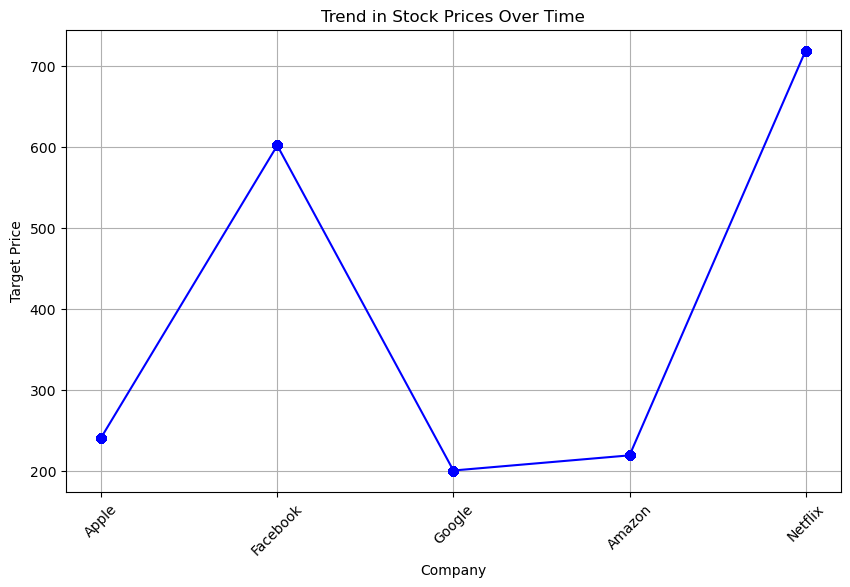

In [40]:
# Plot line chart
plt.figure(figsize=(10, 6))
plt.plot(data1['Company'], data1['Target Price'], marker='o', linestyle='-', color='b')
plt.title("Trend in Stock Prices Over Time")
plt.xlabel("Company")
plt.ylabel("Target Price")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

<Axes: >

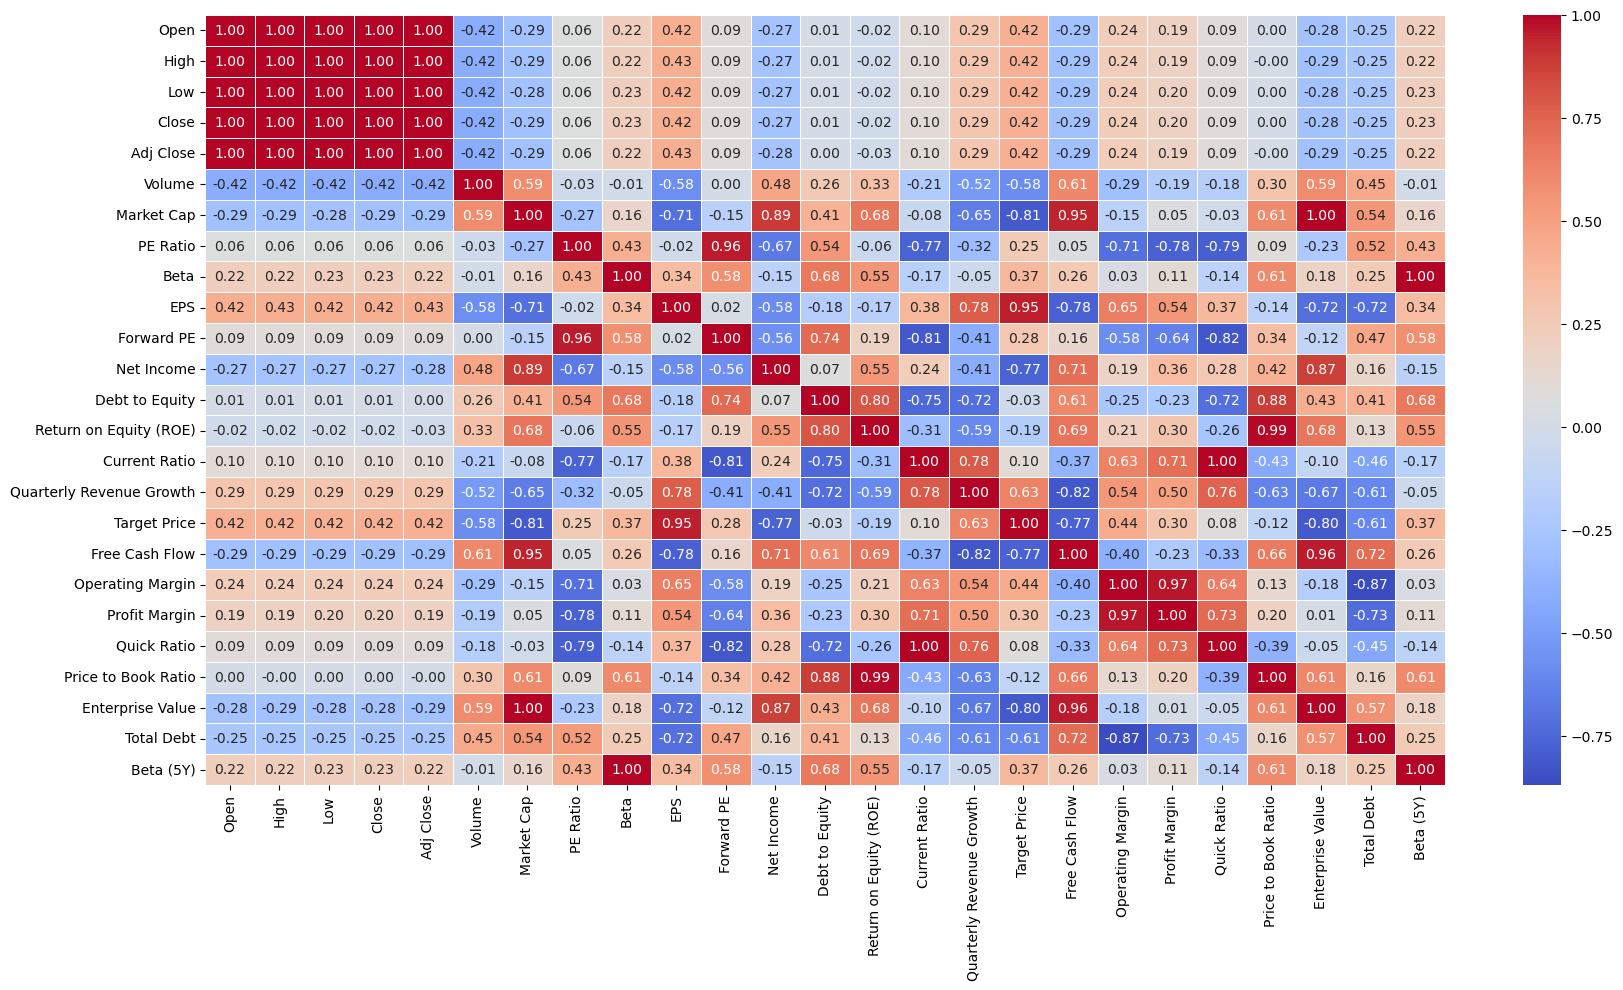

In [41]:
# Select only numerical features for correlation calculation
numerical_data = data1.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(20, 10))  # Optional: Set figure size for better readability

sns.heatmap(correlation_matrix, annot=True,cmap='coolwarm', fmt=".2f", linewidths=0.5)

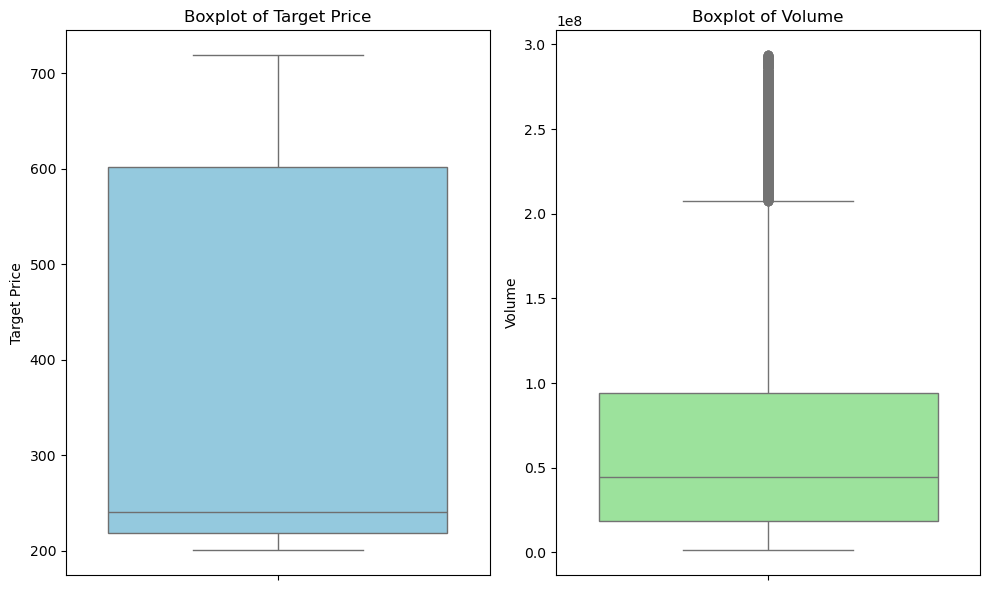

In [42]:
# Boxplot for 'price' and 'volume'
plt.figure(figsize=(10, 6))  # Set the figure size

# Create subplots for better comparison
plt.subplot(1, 2, 1)
sns.boxplot(data=data1, y='Target Price', color='skyblue')
plt.title("Boxplot of Target Price")
plt.ylabel("Target Price")

plt.subplot(1, 2, 2)
sns.boxplot(data=data1, y='Volume', color='lightgreen')
plt.title("Boxplot of Volume")
plt.ylabel("Volume")

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

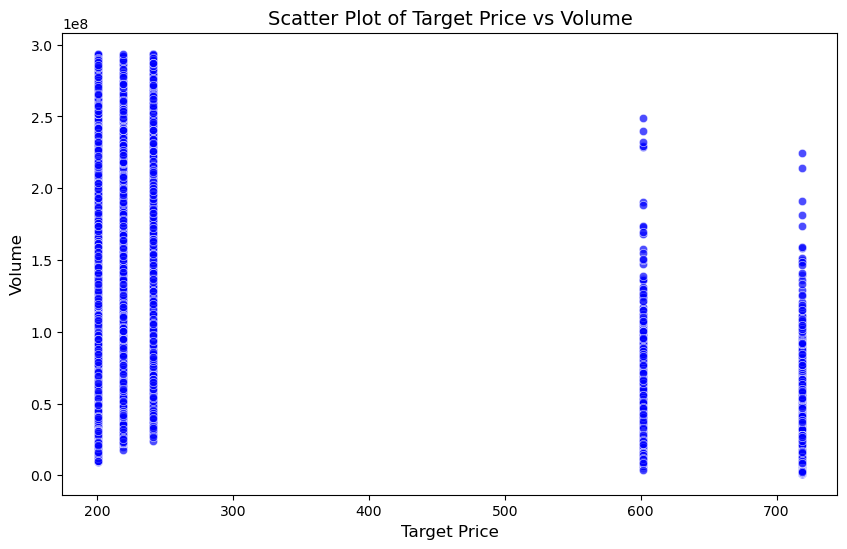

In [43]:
plt.figure(figsize=(10, 6))  # Set figure size
sns.scatterplot(data=data1, x='Target Price', y='Volume', color='blue', alpha=0.7)

# Add titles and labels
plt.title("Scatter Plot of Target Price vs Volume", fontsize=14)
plt.xlabel("Target Price", fontsize=12)
plt.ylabel("Volume", fontsize=12)

# Show the plot
plt.show()

### Feature Selection


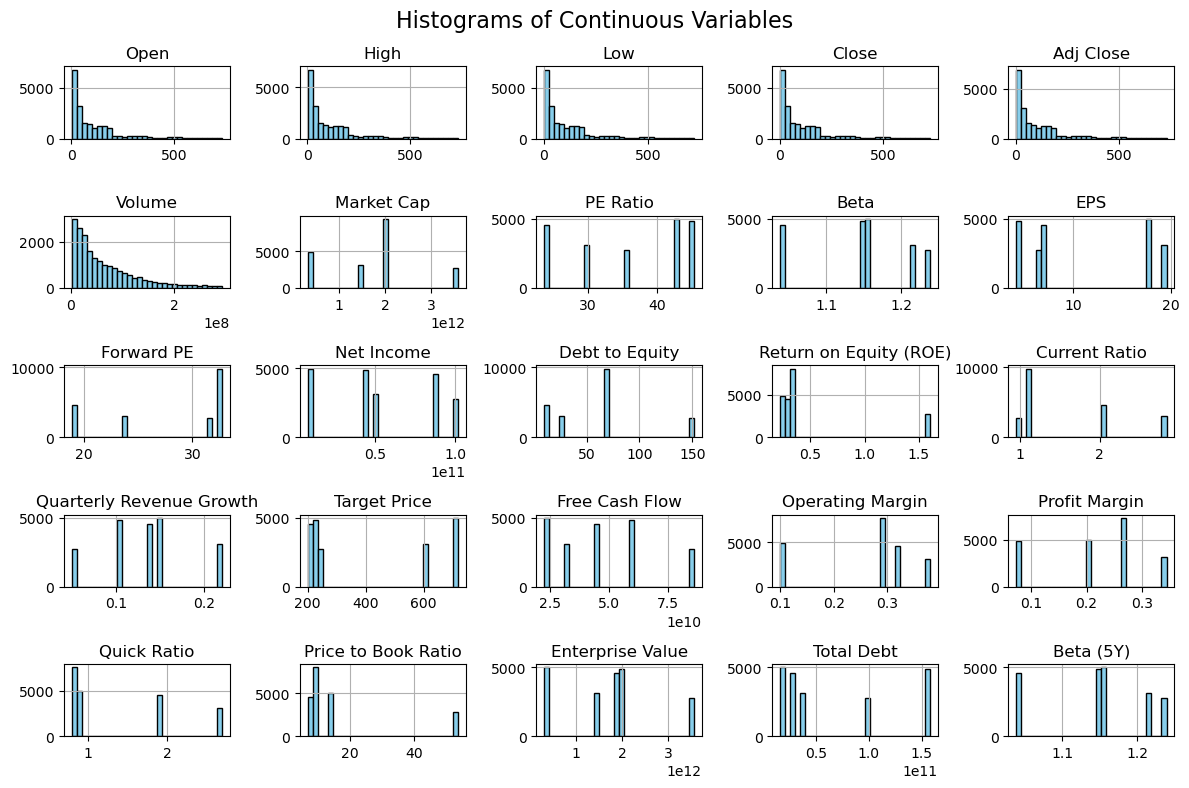

In [45]:
# Continuous Columns: Correlation Analysis and Histograms

continuous_columns = data1.select_dtypes(include=['float64', 'int64']).columns

# Plot histograms for continuous variables
data1[continuous_columns].hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Continuous Variables", fontsize=16)
plt.tight_layout()
plt.show()


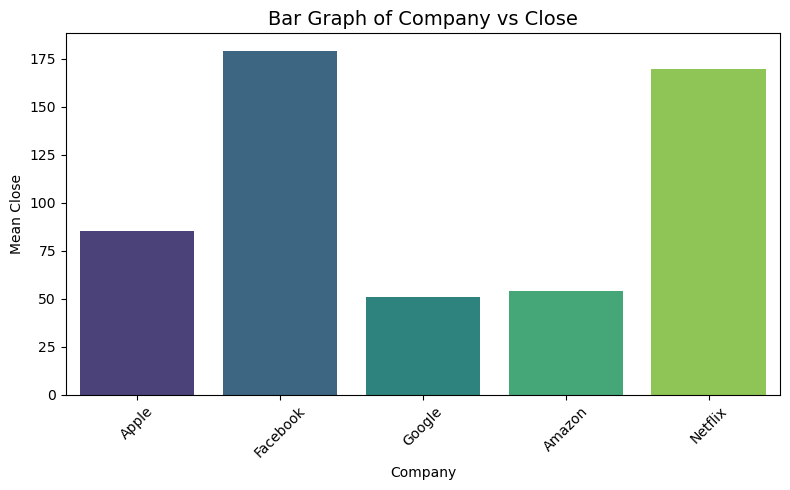

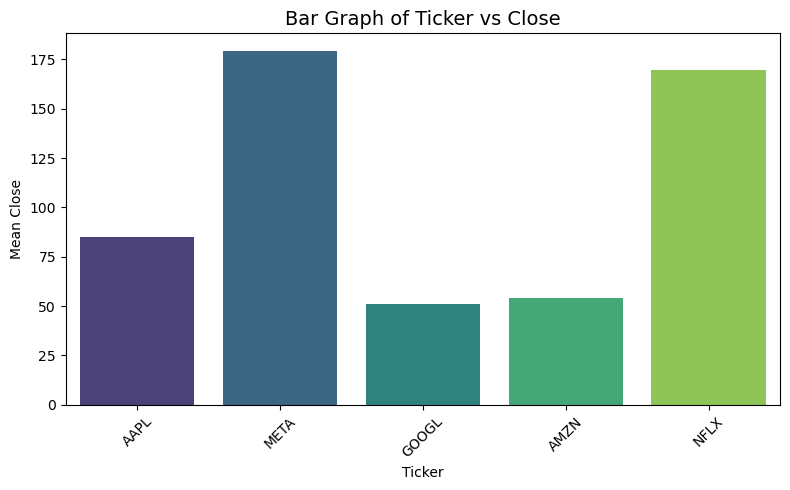

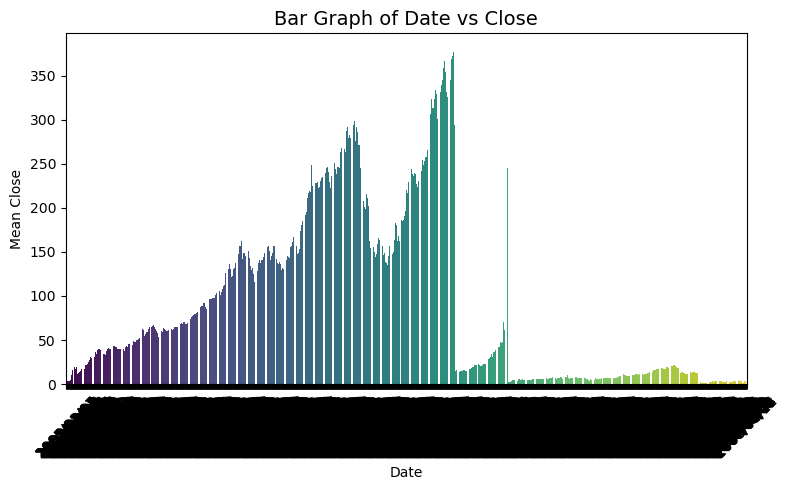

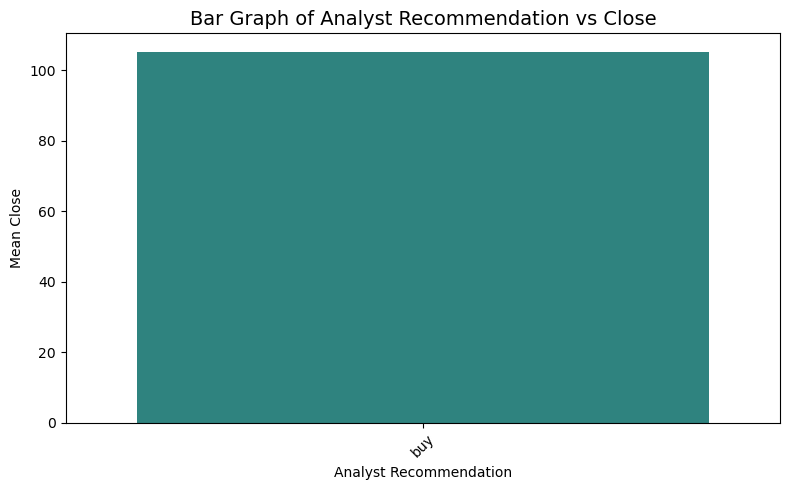

In [46]:
# Categorical Variables: ANOVA Test and Bar Graphs
categorical_columns = data1.select_dtypes(include=['object']).columns

# Iterate through each categorical column and plot a bar graph
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='Close', data=data1, ci=None, palette='viridis')
    plt.title(f"Bar Graph of {col} vs Close", fontsize=14)
    plt.xticks(rotation=45)  # Rotate x-axis labels if needed
    plt.ylabel("Mean Close")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

## 3. Model Development
### Train-Test Split:


In [48]:
# Calculate the split index
split_data = int(len(data1) * 0.8)  # 80% for training, 20% for testing

# Split the dataset
train_data = data1.iloc[:split_data]  # First 80% for training
test_data = data1.iloc[split_data:]  # Remaining 20% for testing

# Display the shapes of the splits
print("Training Data Shape:", train_data.shape)
print("Testing Data Shape:", test_data.shape)

Training Data Shape: (16219, 29)
Testing Data Shape: (4055, 29)


### Normalize Numerical Features:
Normalizing numerical features refers to the process of adjusting the scale of numerical data so that it falls within a specific range or has a particular statistical property. 

In [50]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Select features to scale
features_to_scale = ['Open', 'Close', 'Volume']

# Min-Max Scaling (0 to 1)
min_max_scaler = MinMaxScaler()
data1_minmax_scaled = data1.copy()
data1_minmax_scaled[features_to_scale] = min_max_scaler.fit_transform(data1[features_to_scale])

# Standard Scaling (mean = 0, std = 1)
standard_scaler = StandardScaler()
data1_standard_scaled = data1.copy()
data1_standard_scaled[features_to_scale] = standard_scaler.fit_transform(data1[features_to_scale])

# Display scaled data examples
print("Min-Max Scaled Data (First 5 rows):\n", data1_minmax_scaled[features_to_scale].head())
print("\nStandard Scaled Data (First 5 rows):\n", data1_standard_scaled[features_to_scale].head())


Min-Max Scaled Data (First 5 rows):
        Open     Close    Volume
0  0.000309  0.000314  0.937478
1  0.000021  0.000019  0.850624
2  0.000072  0.000104  0.989859
3  0.000370  0.000368  0.914174
4  0.000362  0.000386  0.965980

Standard Scaled Data (First 5 rows):
        Open     Close    Volume
0 -0.796030 -0.796278  3.334874
1 -0.797653 -0.797931  2.930258
2 -0.797368 -0.797451  3.578891
3 -0.795684 -0.795976  3.226307
4 -0.795733 -0.795877  3.467650


In [51]:
!pip install xgboost


## Model Selection:


In [53]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Define Features and Target
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']  
target = 'Close'  # The target variable

# Define X (features) and y (target) from the 'data1' DataFrame
X = data1[features]  # Extract feature columns
y = data1[target]    # Extract the target column

# Step 2: Split Data into Training and Testing Sets
# Using shuffle=False to preserve temporal order (important for time series data)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Initialize Models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, random_state=42)
}

# Step 4: Train and Evaluate Each Model
results = []
for model_name, model in models.items():
    # Train the model
    model.fit(train_X, train_y)
    
    # Make predictions
    predictions = model.predict(test_X)
    
    # Calculate metrics
    mse = mean_squared_error(test_y, predictions)
    rmse = mean_squared_error(test_y, predictions, squared=False)  # RMSE
    mae = mean_absolute_error(test_y, predictions)  # MAE
    r2 = r2_score(test_y, predictions)  # R^2
    
    # Store results
    results.append({
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R^2": r2
    })

# Step 5: Convert results to DataFrame for tabular display
results_df = pd.DataFrame(results)

# Display results in table format
print(results_df)


               Model         MSE       RMSE        MAE       R^2
0  Linear Regression    1.301191   1.140698   0.649398  0.999968
1      Decision Tree  239.795702  15.485338   3.795410  0.994086
2      Random Forest  240.917617  15.521521   3.740449  0.994058
3  Gradient Boosting  237.611825  15.414663   4.145177  0.994140
4            XGBoost  650.232810  25.499663  10.309444  0.983963


### Train the dataset and cross-validation
cross-validation evaluates each combination using cross-validation to ensure robust performance.

In [55]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Step 1: Define Features and Target
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']  
target = 'Close'  # The target variable

# Define X (features) and y (target) from the 'data1' DataFrame
X = data1[features]  # Extract feature columns
y = data1[target]    # Extract the target column

# Step 2: Initialize the Linear Regression Model
best_model = LinearRegression()

# Step 3: Perform K-Fold Cross-Validation (e.g., 5 folds)
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive for easier interpretation
cv_scores = -cv_scores

# Step 4: Display Results
print(f"Cross-Validation MSE Scores (for each fold): {cv_scores}")
print(f"Mean Cross-Validation MSE: {np.mean(cv_scores):.4f}")
print(f"Standard Deviation of Cross-Validation MSE: {np.std(cv_scores):.4f}")


Cross-Validation MSE Scores (for each fold): [2.9620247  0.44227935 0.22188147 0.14581309 1.30150673]
Mean Cross-Validation MSE: 1.0147
Standard Deviation of Cross-Validation MSE: 1.0569


## Hyperparameter Tuning### GridSearchCV
 It tries all possible combinations of hyperparameter values you define in a grid.

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Step 1: Define the model and preprocessing
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Preprocessing: Standardize features
    ('linear_reg', LinearRegression())  # Model: Linear Regression
])

# Step 2: Define the hyperparameters grid
param_grid = {
    'linear_reg__fit_intercept': [True, False],  # Whether to include an intercept
}

# Step 3: Set up Grid Search
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

# Step 4: Fit the GridSearchCV object
grid_search.fit(X, y)

# Step 5: Get the best parameters and score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation MSE: {-grid_search.best_score_:.4f}")


Best Hyperparameters: {'linear_reg__fit_intercept': True}
Best Cross-Validation MSE: 1.0147


## MLflow Integration

In [60]:
!pip install mlflow


## Log experiments during model training:
### linear_regression

In [62]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Set up MLflow experiment
mlflow.set_experiment("linear_regression_experiment")

# Step 2: Prepare data
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']  
target = 'Close'  # The target variable

X = data1[features]
y = data1[target]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Train the model inside MLflow context

with mlflow.start_run(run_name='LR_Model'):  # Log this run to MLflow
    # Initialize and train the model
    model = LinearRegression()
    model.fit(train_X, train_y)
    
    # Step 4: Make predictions
    predictions = model.predict(test_X)
    
    # Step 5: Calculate metrics
    mse = mean_squared_error(test_y, predictions)
    rmse = mean_squared_error(test_y, predictions, squared=False)
    mae = mean_absolute_error(test_y, predictions)
    r2 = r2_score(test_y, predictions)
    
    # Log metrics
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)
    
    # Log model parameters
    mlflow.log_param("fit_intercept", model.fit_intercept)
    
    # Log the model
    mlflow.sklearn.log_model(model, "model")

    # Optionally log any other information you want
    print(f"Logged run with MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")


2025/01/23 16:30:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged run with MSE: 1.3011910991997286, RMSE: 1.1406976370623938, MAE: 0.6493982519761634, R2: 0.9999679083908564


### DecisionTree_Model

In [64]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Set up MLflow experiment
mlflow.set_experiment("linear_regression_experiment")

# Step 2: Prepare data
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']  
target = 'Close'  # The target variable

X = data1[features]
y = data1[target]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)

# Step 3: Train the model inside MLflow context

with mlflow.start_run(run_name='DecisionTree_Model'):  # Log this run to MLflow
    # Initialize and train the model
    model = DecisionTreeRegressor()
    model.fit(train_X, train_y)
    
    # Step 4: Make predictions
    predictions = model.predict(test_X)
    
    # Step 5: Calculate metrics
    mse = mean_squared_error(test_y, predictions)
    rmse = mean_squared_error(test_y, predictions, squared=False)
    mae = mean_absolute_error(test_y, predictions)
    r2 = r2_score(test_y, predictions)
    
    # Log metrics
    mlflow.log_metric("MSE", mse)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("R2", r2)
    
    # Log model parameters
    #mlflow.log_param("fit_intercept", model.fit_intercept)
    
    # Log the model
    mlflow.sklearn.log_model(model, "model")

    # Optionally log any other information you want
    print(f"Logged run with MSE: {mse}, RMSE: {rmse}, MAE: {mae}, R2: {r2}")


2025/01/23 16:30:16 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged run with MSE: 239.79186546757995, RMSE: 15.485214414646636, MAE: 3.8342005254579545, R2: 0.9940859518427917


### Compare all models

In [70]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Set up MLflow experiment
mlflow.set_experiment("model_comparison_experiment")

features = ['Open', 'High', 'Low', 'Adj Close', 'Volume']  
target = 'Close'  # The target variable

X = data1[features]
y = data1[target]

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, shuffle=False)


# Step 3: Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": XGBRegressor()
}

# Step 4: Train and log each model
results = []  # To store results for comparison

for model_name, model in models.items():
    with mlflow.start_run(run_name=model_name):  # Log each model as a separate run
        # Train the model
        model.fit(train_X, train_y)

        # Step 5: Make predictions
        predictions = model.predict(test_X)

        # Step 6: Calculate metrics
        mse = mean_squared_error(test_y, predictions)
        rmse = mean_squared_error(test_y, predictions, squared=False)
        mae = mean_absolute_error(test_y, predictions)
        r2 = r2_score(test_y, predictions)

        # Step 7: Log metrics
        mlflow.log_metric("MSE", mse)
        mlflow.log_metric("RMSE", rmse)
        mlflow.log_metric("MAE", mae)
        mlflow.log_metric("R2", r2)

        # Define input example
        input_example = pd.DataFrame({
            "Open": [150.5],
            "High": [152.0],
            "Low": [149.8],
            "Adj Close": [151.2],
            "Volume": [5000000]
        })
        mlflow.sklearn.log_model(model, "model",input_example=input_example)

        # Store results for display
        results.append({
            "Model": model_name,
            "MSE": mse,
            "RMSE": rmse,
            "MAE": mae,
            "R2": r2
        })

        print(f"{model_name} logged with MSE: {mse:.4f}, RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")

# Step 9: Display results
import pandas as pd
results_df = pd.DataFrame(results)
print("\nModel Performance Comparison:")
print(results_df)


Linear Regression logged with MSE: 1.3012, RMSE: 1.1407, MAE: 0.6494, R2: 1.0000
🏃 View run Linear Regression at: http://127.0.0.1:5000/#/experiments/148254989992867857/runs/f5fff57d8ebf41909a573305ad2c276a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148254989992867857


Decision Tree logged with MSE: 238.4027, RMSE: 15.4403, MAE: 3.7432, R2: 0.9941
🏃 View run Decision Tree at: http://127.0.0.1:5000/#/experiments/148254989992867857/runs/bd28f7c55fa448c2839ae890b413e8c7
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148254989992867857


Random Forest logged with MSE: 238.5089, RMSE: 15.4437, MAE: 3.7249, R2: 0.9941
🏃 View run Random Forest at: http://127.0.0.1:5000/#/experiments/148254989992867857/runs/b8ca812990e743afa423b7433cf3e892
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148254989992867857


Gradient Boosting logged with MSE: 234.9117, RMSE: 15.3268, MAE: 4.1149, R2: 0.9942
🏃 View run Gradient Boosting at: http://127.0.0.1:5000/#/experiments/148254989992867857/runs/dd2e8d1ccff144e987cf74d472e2d343
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148254989992867857


XGBoost logged with MSE: 650.2328, RMSE: 25.4997, MAE: 10.3094, R2: 0.9840
🏃 View run XGBoost at: http://127.0.0.1:5000/#/experiments/148254989992867857/runs/45979b7be5e844509548d497c1140e51
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148254989992867857

Model Performance Comparison:
               Model         MSE       RMSE        MAE        R2
0  Linear Regression    1.301191   1.140698   0.649398  0.999968
1      Decision Tree  238.402744  15.440296   3.743228  0.994120
2      Random Forest  238.508938  15.443735   3.724861  0.994118
3  Gradient Boosting  234.911669  15.326828   4.114931  0.994206
4            XGBoost  650.232810  25.499663  10.309444  0.983963


In [72]:
import mlflow.sklearn

# Set the tracking URI for the MLflow server
mlflow.set_tracking_uri("http://127.0.0.1:5000")

# Define the best model's run ID and its URI
best_model_run_id = "f5fff57d8ebf41909a573305ad2c276a"
best_model_uri = f"runs:/{best_model_run_id}/model"

# Load the best model
best_model = mlflow.sklearn.load_model(best_model_uri)

# Save and log the best model in a new MLflow run
with mlflow.start_run(run_name="best_model"):
    # Log the best model artifact
    mlflow.sklearn.log_model(
        sk_model=best_model,
        artifact_path="best_model",
        registered_model_name="Best_Stock_Model"  # Registers the model with a name in the Model Registry
    )

print("Best model has been logged and saved for deployment.")


2025/01/23 16:41:26 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'Best_Stock_Model'.
2025/01/23 16:41:26 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: Best_Stock_Model, version 1


🏃 View run best_model at: http://127.0.0.1:5000/#/experiments/148254989992867857/runs/a2a9e0312fdb439c801a3f290b1218c8
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/148254989992867857
Best model has been logged and saved for deployment.


Created version '1' of model 'Best_Stock_Model'.
